https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 1 - Caracteristica diodei

#### 1.1 Montajul experimental:
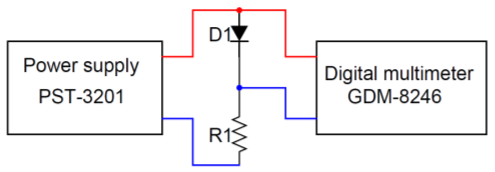

#### 1.2 Procedura de masurare:
Multimetrul măsoară căderea de tensiune pe diodă. Curentul poate fi măsurat indirect,
folosind următoarea formulă (Vpsu reprezintă tensiunea de ieșire a sursei de alimentare):
𝐼𝐷 = (𝑉𝑃𝑆𝑈 − 𝑉𝐷) / 𝑅1


#### 1.3 Codul sursa:
1.3.1 Initializarea instrumentelor si a interfetelor grafice

In [37]:
using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
using Plots; # libraria responsabila de generarea de grafice
using DataFrames; #
using CSV; # libraria responsabila de salvarea datelor in format .csv

In [ ]:
dmm = connect!("ASRL5::INSTR")
psu = connect!("ASRL14::INSTR")
#fgen = connect!("ASRL8::INSTR")
#scope = connect!("USB0::0x0699::0x0364::C057729::INSTR")

In [12]:
#@async start_gui(psu_handle = psu, dmm_handle = dmm, fgen_handle = fgen, scope_handle = scope)
@async start_gui();

1.3.2 Connfigurarea instrumentelor

In [ ]:
# Sursa de tensiune
# C1
set_source_lev(psu, "C1", 0)
set_volt_protection(psu, "C1", 20)
set_max_curr(psu, "C1", 0.5)
# C2
set_source_lev(psu, "C2", 0)
set_volt_protection(psu, "C2", 20)
set_max_curr(psu, "C2", 0.5)
# C3
set_source_lev(psu, "C3", 0)
set_volt_protection(psu, "C3", 20)
set_max_curr(psu, "C3", 0.5)
# Output on
set_outp(psu, "C1", "on") # PST3201 nu poate porni/opri canale individual

# Multimetrul GDM8246
set_sense_func(fgen, "C1", "DCV") # alte functii: ACV, AC+DCV, RIPPLE, OHM
set_sense_range_auto(fgen, "C1", "on") # autorange

1.3.3 Definirea stimulilor si a variabilelor auxiliare

In [ ]:
R1 = 47
volt_step = 0.1
volt_range = volt_step:volt_step:3.0
diode_volt = []
diode_crt = []

1.3.4 Bucla de masurare

In [ ]:
for crt_volt in volt_range
    # setare tensiune psu
    set_source_lev(psu, "C1", crt_volt)
    sleep(0.3)
    # masurare tensiune cu dmm
    volt_meas = get_primary_measurement(dmm, "C1")
    # calcul curent pe baza formulei
    crt_meas = (crt_volt - volt_meas)/R
    # adaugarea masuratorilor in vectorii de rezultate
    push!(diode_volt, volt_meas)
    push!(diode_crt, crt_meas)
end

1.3.5 Generarea caracteristicii Curent-Tensiune a diodei, dupa incheierea masuratorilor

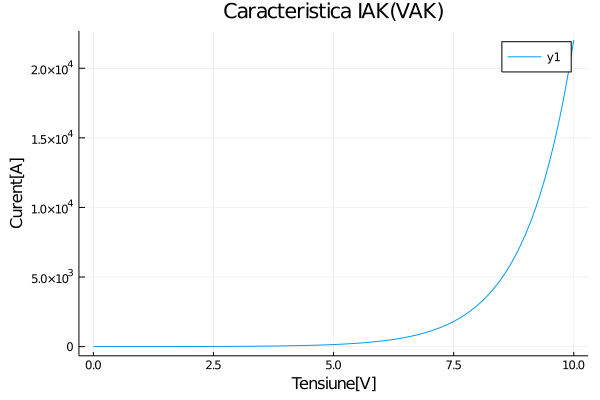

In [8]:
h=plot(diode_volt, diode_crt);
title!("Caracteristica IAK(VAK)");
xlabel!("Tensiune[V]");
ylabel!("Curent[A]");
display(h)

1.3.6 Deconectarea instrumentelor

In [ ]:
disconnect!(dmm)
disconnect!(psu)

1.3.7 Salvarea datelor in fisierul .csv

In [34]:
df = DataFrame("Voltage [V]" => diode_volt, "Current [A]" => diode_crt)
CSV.write("dioda_df.csv", df)

#CSV.write("dioda.csv", (diode_volt = diode_volt, diode_crt = diode_crt); header = ["Voltage [V]", "Current [A]"])

"C:\\Julia 1.5.0\\.julia\\packages\\TIVM\\TIVM\\test"

"dioda_df.csv"